# Lecture 16 Neural Network (and Deep Learning)

## Basic Structures of Neural Network (NN)

Intuitively, Neural Network is nothing but the construction of one nonlinear (vector-valued) function $\mathbf{h}(\mathbf{x}; W, b)\in\mathbb{R}^{p}\to\mathbb{R}^{k}$ with a series of composite functions (layers). For the interactive visualization and exploration of NN, you can refer [here](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.45692&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

The layers can be further classified into three categories:

- **Input layer**: $p$ nodes representing the input sample $x\in\mathbb{R}^{p}$


- **Hidden layers**: Calculate the values on the nodes of $(l+1)$-th layers based on those on the $l$-th layer as
$$
\begin{aligned}
\mathbf{z}^{(l+1)} &= W^{(l)} \mathbf{a}^{(l)} + \mathbf{b}^{(l)}   \\
\mathbf{a}^{(l+1)} &= \sigma(\mathbf{z}^{(l+1)})
\end{aligned}
$$
where $\sigma$ is the nonlinear [activation function](https://en.wikipedia.org/wiki/Activation_function) (common choices include sigmoid, tanh or ReLU), and the second equation is element-wize.
  
    *Note*: Suppose there are $m$ nodes in layer $l$ and $n$ nodes in layer $(l+1)$. Then there are $(m+1)\times n$ trainable parameters between the two layers, or sometimes by convention, we just say they are the parameters are on the $(l+1)$-th layer.


- **Output layer**: $k$ nodes representing the output, and dependent on the problem can be

    1) For regression problem, just as another regular hidden layer of $k$ nodes
   
    2) For classification problem, apply the [softmax function](https://en.wikipedia.org/wiki/Softmax_function) on the vector $\mathbf{z}$ to ensure that the output is the probability vector for $k$ classes.


After constructing the mapping, in supervised problem, the loss function $J(W,b; \mathbf{x}, y)$ can be choosed the same as other machine learning models.

- For regression: MSE (mean squared error)

- For classification: Cross Entropy

**Interesting Facts** (not required in exam):

- Logistic regression can be viewed as "the simplest" NN with only the input layer ($p$ nodes) and output layer (softmax output). Because it only has ["one layer of parameters"](https://www.datasciencecentral.com/profiles/blogs/logistic-regression-as-a-neural-network#:~:text=To%20recap%2C%20Logistic%20regression%20is,a%20one%2Dlayer%20neural%20network.), sometimes it is also called [single-layer NN](http://yann.lecun.com/exdb/mnist/).


- NN can also be used in unsupervised tasks, such as [Autoencoder](https://en.wikipedia.org/wiki/Autoencoder#:~:text=An%20autoencoder%20is%20a%20type,to%20ignore%20signal%20%E2%80%9Cnoise%E2%80%9D.) for dimension reduction.


## Training Algorithms: BP (Back Propagation) and SGD (or other optimization method)

As we've known well, training the machine learning model is largely dependent on minimizing the loss function, where its gradient provides the important information.

Intuitively speaking, **back propagation** is just the right algorithm to find such gradient for the training of NN, which is based on the **chain-rule** of derivatives in hierarchical network-structured composite function.

In detail, the backpropagation algorithm for NN training can be described as (not required):

> Step 1: Perform a **forward pass**, computing the values for layers $L_2$, $L_3$, and so on up to the output layer $L_{n_l}$. We take the loss of MSE in regression as example.
>
> Step 2: For each output unit $i$ in layer $n_l$ (the output layer), set
$$
\delta^{(n_l)}_i
:= \frac{\partial}{\partial z^{(n_l)}_i} \;J(W,b; \mathbf{x}, y) = \frac{\partial}{\partial z^{(n_l)}_i} 
\frac{1}{2} \left\|y - h(\mathbf{x};W,b)\right\|^2 = - (y - a^{(n_l)}_i) \cdot \sigma'(z^{(n_l)}_i)
$$
>
> Step 3: For $l=n_l−1,n_l−2,n_l−3,\dots,2$ For each node $i$ in layer $l$, set
$$\delta^{(l)}_i : = \frac{\partial}{\partial z^{(l)}_i} \;J(W,b; \mathbf{x}, y) =
\frac{\partial}{\partial a^{(l)}_i} \;J(W,b; \mathbf{x}, y)  
\frac{\partial a^{(l)}_i}{\partial z^{(l)}_i}=  \left( \sum_{j=1}^{s_{l+1}} w^{(l)}_{ji} \delta^{(l+1)}_j \right) \sigma'(z^{(l)}_i)
$$
>
> Step 4: the desired partial derivatives are computed as:
$$
\begin{aligned}
\frac{\partial}{\partial w_{ij}^{(l)}} J(W,b; \mathbf{x}, y) &= a^{(l)}_j \delta_i^{(l+1)} \\
\frac{\partial}{\partial b_{i}^{(l)}} J(W,b; \mathbf{x}, y) &= \delta_i^{(l+1)}.
\end{aligned}
$$

After obtaining the gradient with BP, we can then use stochastic gradient descent (SGD, or other methods) to minimize the loss function.

## Deep Learning: What packages/platforms to choose?

By making the NN "deeper" (increase the hidden layers and add other complex structures), we have the deep learning models. Of course, deep NN will face the serious problem of overfitting (can be alleviated by regulariztion or dropout) and huge computation cost (can be solved by using GPU instead of CPU).

The [neural network models](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) in scikit-learn does not provide the flexible support for large-scale deep learning applications.

For beginners, [Keras](https://keras.io/) (high-level API that supports [tensorflow](https://www.tensorflow.org/), which developed by Google) and [Pytorch](https://pytorch.org/) (developed by Facebook) are the most accessible and popular deep learning packages in Python.

To get acess to free GPU resources for training deep learning models (see here for [why GPU is widely applied in deep learning](https://www.analyticsvidhya.com/blog/2017/05/gpus-necessary-for-deep-learning/)), you can use the online notebook provided by Kaggle or [google colab](https://colab.research.google.com/notebooks/intro.ipynb). If you are using very basic Keras or Pytorch, there's no need to change the code to adopt to GPU computation. With GPU, you can even give up sklearn and replace much of your codes using the GPU-version machine learning algorithms with the package [cuml](https://github.com/rapidsai/cuml).

## Exploring Deep Learning with Keras

Let's build our first "deep learning" model (indeed a simple Neural Network model trained with deep learning package)

In [ ]:
pip install --upgrade pip

In [ ]:
pip install tensorflow # you can also setup the gpu if it is supported in your local computer -- unfortunately, recent versions of mac OS are no longer supported. https://www.tensorflow.org/install/gpu

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# sequential model to define a graph of neural network
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),# input layer
  tf.keras.layers.Dense(128, activation='relu'), # hidden layer
  tf.keras.layers.Dense(64, activation='relu'), # hidden layer
  tf.keras.layers.Dense(10, activation='softmax') # output layer for classification
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=100, batch_size = 2048)
model.evaluate(x_test, y_test)

We can also try autoencoder for the dimension reduction

In [2]:
from keras import layers
# functional API to define a graph of neural network -- more flexible than sequential

input_img = keras.Input(shape=(784,)) # input layer
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded = layers.Dense(2, activation='relu')(encoded)

decoded = layers.Dense(8, activation='relu')(encoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [3]:
autoencoder = keras.Model(input_img, decoded) # builds up the model
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 32)               

In [10]:
autoencoder.compile(optimizer='adam', loss= tf.keras.losses.MeanSquaredError())

autoencoder.fit(x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))), x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))),
                epochs=100,
                batch_size=1024,
                shuffle=True)

Epoch 1/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0440
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0431
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0429
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0428
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0428
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0427
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0427
Epoch 8/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0427
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0427
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0427
Epoch 11/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0426
Epoch 12/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0426
Epoch 13/100
10/10 [=================

In [11]:
encoder = keras.Model(input_img, encoded) # also define the encoder part
encoder.get_weights()

[array([[-0.05947556,  0.02999774,  0.03496894, ...,  0.06997635,
         -0.02443226, -0.05765174],
        [ 0.01859826, -0.05337664,  0.01222368, ...,  0.02130038,
          0.03675849, -0.02764505],
        [-0.00772542,  0.01606809,  0.00638994, ..., -0.0793802 ,
         -0.07776325, -0.03962534],
        ...,
        [-0.00762312,  0.03418265,  0.01706019, ...,  0.04284579,
          0.02790998,  0.01960173],
        [ 0.07160843,  0.01389702,  0.04417362, ..., -0.0403284 ,
          0.04575133,  0.07278159],
        [-0.06782561,  0.07357565, -0.05206133, ...,  0.07031503,
          0.06448487,  0.06966222]], dtype=float32),
 array([ 2.40136936e-01,  2.63595849e-01,  6.58800080e-02,  1.70697942e-01,
         1.90887064e-01, -1.34922396e-02, -1.50258336e-02, -8.04297277e-04,
         2.66798466e-01,  5.87142520e-02, -1.74439456e-02, -1.40925134e-02,
         1.82616100e-01, -2.10637636e-02,  3.52401212e-02,  8.98889229e-02,
        -2.07967479e-02,  6.67532953e-03, -1.54011518e

In [12]:
encoded_coord = encoder.predict(x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))))

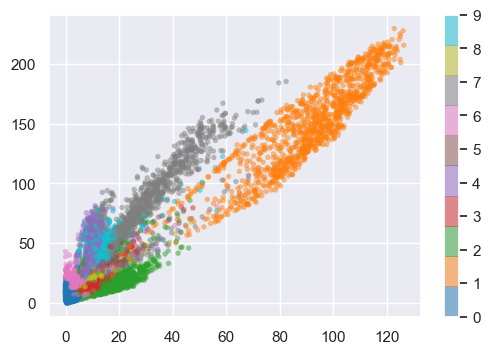

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
fig = plt.figure(dpi=100)
plt.scatter(encoded_coord[:, 0], encoded_coord[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.colorbar()

In [8]:
decoded_imgs = autoencoder.predict(x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))))

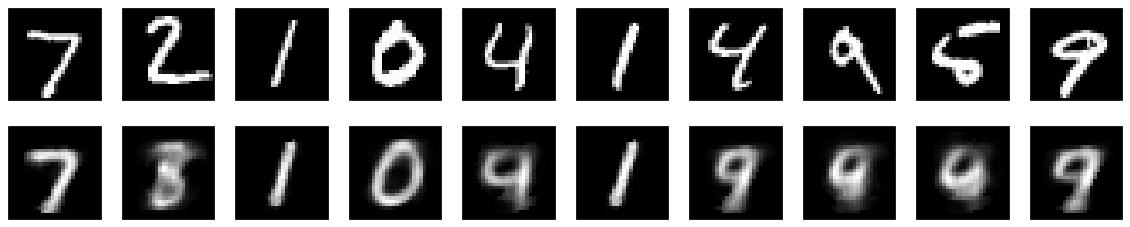

In [9]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Maybe condensing to 2D layer loses too much information. Let's try a more realistic model

In [ ]:
from keras import layers
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()

In [ ]:
autoencoder.compile(optimizer='adam', loss= tf.keras.losses.MeanSquaredError())

autoencoder.fit(x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))), x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))),
                epochs=100,
                batch_size=256,
                shuffle=True)

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_coord = encoder.predict(x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))))
encoded_coord.shape

In [ ]:
from sklearn.manifold import TSNE # for GPU acceleration, use the 
tsne = TSNE(n_jobs = -1)
X_tsne = tsne.fit_transform(encoded_coord)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
fig = plt.figure(dpi=100)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.colorbar()

In [ ]:
decoded_imgs = autoencoder.predict(x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))))
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Other Useful References

- [Stanford CS231](http://cs231n.stanford.edu/)
- [The Deep Learning Book](https://www.deeplearningbook.org/)